<a href="https://colab.research.google.com/github/vpranav5/myrepo/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Pranav Varanasi
UTEID: ptv247

Project 3

Title: How do we get power?

Part 1: Introduction

As recently experienced with the Texas snowstorms, the reliability and efficiency of the energy grid is crucial to maintaining a basic quality of life for an individual.
Issues with power can cause widespread chaos and quickly shut down the fundamental functions of modern society. The key issue made relevant by these Texas storms is the impact of climate change and the need for a continued reliance on renewable energy. With this issue in mind, I became curious as to the main sources of power running all the states across the country. In addition, I began to wonder how much of the country had already transitioned to renewable energy sources like solar, wind, and geothermal and how many states still had a majority dependence on non-renewable sources like natural gas and coal. 

To answer these questions, I chose two datasets that together provide the energy sources by state from 1960 - 2014 as well as region/division identifiers for each state. 
The main advantage I have in grouping these two datasets is to be able to group states by region and identify the main sources of energy. 

More information about these datasets can be found below:

Dataset 1: Energy.csv 
- Provides energy sources by state from 1960 - 2014
- Sources: 
- https://corgis-edu.github.io/corgis/csv/energy/
- https://www.eia.gov/tools/faqs/

Dataset 2: usa_states.csv 
- Provides abbreviations and region/division identifiers for each state
- Source: 
- Inbuilt R-dataset from "stevedata" library
- https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [35]:
# Import package pandas
import pandas as pd

# Import datasets
energyData = pd.read_csv("energy.csv")
stateData = pd.read_csv("usa_states.csv")

# Rename statename variable so it matches up with energy dataset
renameStates = stateData.rename(columns={"statename": "State"})

# Perform left join with energy dataset and state dataset to get state/region association
energyData = energyData.merge(renameStates, on='State', how='left')


# Describe the dataset
energyData.describe()
energyData.head()

,State,Year,Production.Coal,Consumption.Commercial.Coal,Consumption.Commercial.Distillate Fuel Oil,Consumption.Commercial.Geothermal,Consumption.Commercial.Hydropower,Consumption.Commercial.Kerosene,Consumption.Commercial.Liquefied Petroleum Gases,Consumption.Commercial.Natural Gas,Consumption.Commercial.Solar,Consumption.Commercial.Wind,Consumption.Commercial.Wood,Consumption.Electric Power.Coal,Consumption.Electric Power.Distillate Fuel Oil,Consumption.Electric Power.Natural Gas,Consumption.Electric Power.Wood,Consumption.Industrial.Coal,Consumption.Industrial.Distillate Fuel Oil,Consumption.Industrial.Geothermal,Consumption.Industrial.Hydropower,Consumption.Industrial.Kerosene,Consumption.Industrial.Liquefied Petroleum Gases,Consumption.Industrial.Natural Gas,Consumption.Industrial.Other Petroleum Products,Consumption.Industrial.Solar,Consumption.Industrial.Wind,Consumption.Industrial.Wood,Consumption.Refinery.Coal,Consumption.Refinery.Distillate Fuel Oil,Consumption.Refinery.Liquefied Petroleum Gases,Consumption.Refinery.Natural Gas,Consumption.Residential.Coal,Consumption.Residential.Distillate Fuel Oil,Consumption.Residential.Geothermal,Consumption.Residential.Kerosene,Consumption.Residential.Liquefied Petroleum Gases,Consumption.Residential.Natural Gas,Consumption.Residential.Wood,Consumption.Transportation.Coal,...,Expenditure.Electric Power.Distillate Fuel Oil,Expenditure.Electric Power.Natural Gas,Expenditure.Industrial.Coal,Expenditure.Industrial.Distillate Fuel Oil,Expenditure.Industrial.Kerosene,Expenditure.Industrial.Liquefied Petroleum Gases,Expenditure.Industrial.Natural Gas,Expenditure.Industrial.Other Petroleum Products,Expenditure.Residential.Coal,Expenditure.Residential.Distillate Fuel Oil,Expenditure.Residential.Kerosene,Expenditure.Residential.Liquefied Petroleum Gases,Expenditure.Residential.Natural Gas,Expenditure.Residential.Wood,Expenditure.Transportation.Coal,Expenditure.Transportation.Distillate Fuel Oil,Expenditure.Transportation.Liquefied Petroleum Gases,Expenditure.Transportation.Natural Gas,Price.Commercial.Coal,Price.Commercial.Distillate Fuel Oil,Price.Commercial.Kerosene,Price.Commercial.Liquefied Petroleum Gases,Price.Commercial.Natural Gas,Price.Electric Power.Coal,Price.Electric Power.Distillate Fuel Oil,Price.Electric Power.Natural Gas,Price.Industrial.Coal,Price.Industrial.Distillate Fuel Oil,Price.Industrial.Kerosene,Price.Industrial.Liquefied Petroleum Gases,Price.Industrial.Natural Gas,Price.Industrial.Other Petroleum Products,Price.Transportation.Coal,Price.Transportation.Distillate Fuel Oil,Price.Transportation.Liquefied Petroleum Gases,Price.Transportation.Natural Gas,Unnamed: 0,stateabb,region,division
0,Utah,1960,114689.0,2644.0,2110.0,0.0,0.0,33.0,450.0,10482.0,0.0,0.0,35.0,12840.0,67.0,3806.0,0.0,70489.0,5768.0,0.0,2.0,167.0,515.0,34662.0,11571.0,0.0,0.0,344.0,0.0,0.0,0.0,0.0,3805.0,580.0,0.0,5.0,673.0,23398.0,1840.0,1188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,UT,West,Mountain
1,Vermont,1960,0.0,769.0,2434.0,0.0,0.0,245.0,367.0,0.0,0.0,0.0,65.0,516.0,49.0,0.0,0.0,1096.0,1361.0,0.0,689.0,423.0,413.0,0.0,253.0,0.0,0.0,4420.0,0.0,0.0,0.0,0.0,1107.0,11906.0,0.0,3973.0,799.0,0.0,3457.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47,VT,Northeast,New England
2,Rhode Island,1960,0.0,210.0,8046.0,0.0,0.0,95.0,224.0,1753.0,0.0,0.0,20.0,16146.0,76.0,356.0,0.0,95.0,2139.0,0.0,7.0,560.0,128.0,2969.0,1301.0,0.0,0.0,1789.0,0.0,0.0,0.0,0.0,302.0,32079.0,0.0,4367.0,448.0,6946.0,1049.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,RI,Northeast,New England
3,Michigan,1960,0.0,24324.0,18710.0,0.0,0.0,3206.0,735.0,44506.0,0.0,0.0,418.0,256299.0,451.0,5391.0,0.0,331969.0,41

My energy dataset has 8 rows or observations and 89 columns. Of the 89 columns, 84 are numeric variables and 5 are categorical variables.

EDA:


In [13]:
# Get mean for hydropower column
energyData['Consumption.Commercial.Hydropower'].mean()

7.992156862745098

In [14]:
# Get mean for natural gas column
energyData['Consumption.Industrial.Natural Gas'].mean()

165141.75187165776

For my statistic, I chose to calculate the mean hydropower and natural gas consumption from 1960 - 2014. I chose to calculate this statistic on hydropower and natural gas since they are the biggest sources of renewable and nonrenwable power in the United States.

The results show that the mean hydropower consumption over this time period is around 8 BTU (British Thermal Unit) and mean natural gas consumption is around 165142 BTU.

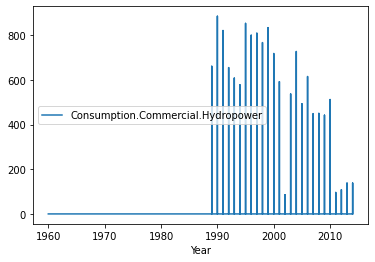

In [15]:
# Use pandas plot function, specify axis variables
energyData.plot.line(x = 'Year', y = 'Consumption.Commercial.Hydropower')

For my visualization for a numeric variable, I used the pandas line plot function to show the hydropower energy consumption in the U.S. from 1960 to 2014. This visualization demonstrates that hydropower only really picked up as an energy source in the 1990s and has since lessened its domiance over the total energy grid.

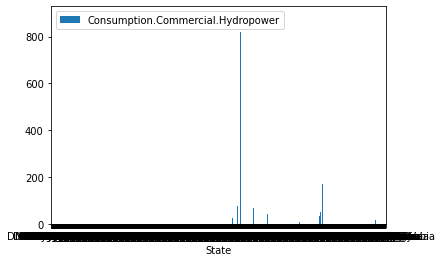

In [33]:
# Use pandas barplot function to show hydropower consumption by each state (categorical variable)
energyData.plot.bar(x='State', y='Consumption.Commercial.Hydropower')

My above visualization shows the hydropower energy consumption grouped by each state over the time period from 1960 - 2014. As can be seen, it appears a couple states are distinct outliers when it comes to their reliance on hydropower while most states only consume at a level below 200 BTU.